In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [2]:
file_path ='resources/goal_keepers.csv'
goal_keepers_df = pd.read_csv(file_path)
goal_keepers_df['rating'] = (goal_keepers_df['potential']+goal_keepers_df['overall'])/2
goal_keepers_df

,overall,potential,field_position,height,weight,crossing,finishing,heading_accuracy,short_passing,volleys,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,91,93,GK,6'4,168,17.0,13.0,21.0,50.0,13.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,92.0
1,90,93,GK,6'2,192,13.0,11.0,15.0,29.0,13.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,91.5
2,89,92,GK,6'2,187,15.0,14.0,11.0,36.0,14.0,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,90.5
3,89,90,GK,6'6,212,14.0,14.0,13.0,33.0,12.0,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,89.5
4,89,89,GK,6'4,203,15.0,13.0,25.0,55.0,11.0,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,48,65,GK,6'0,176,10.0,7.0,11.0,22.0,6.0,...,28.0,16.0,11.0,10.0,47.0,46.0,50.0,45.0,51.0,56.5
2021,48,58,GK,6'1,172,19.0,15.0,15.0,26.0,14.0,...,28.0,12.0,15.0,16.0,45.0,49.0,50.0,50.0,45.0,53.0
2022,48,48,GK,6'2,190,11.0,12.0,12.0,18.0,11.0,...,56.0,15.0,15.0,13.0,45.0,48.0,44.0,49.0,46.0,48.0
2023,47,65,GK,6'3,187,10.0,6.0,10.0,25.0,6.0,...,23.0,6.0,10.0,11.0,52.0,52.0,52.0,40.0,44.0,56.0


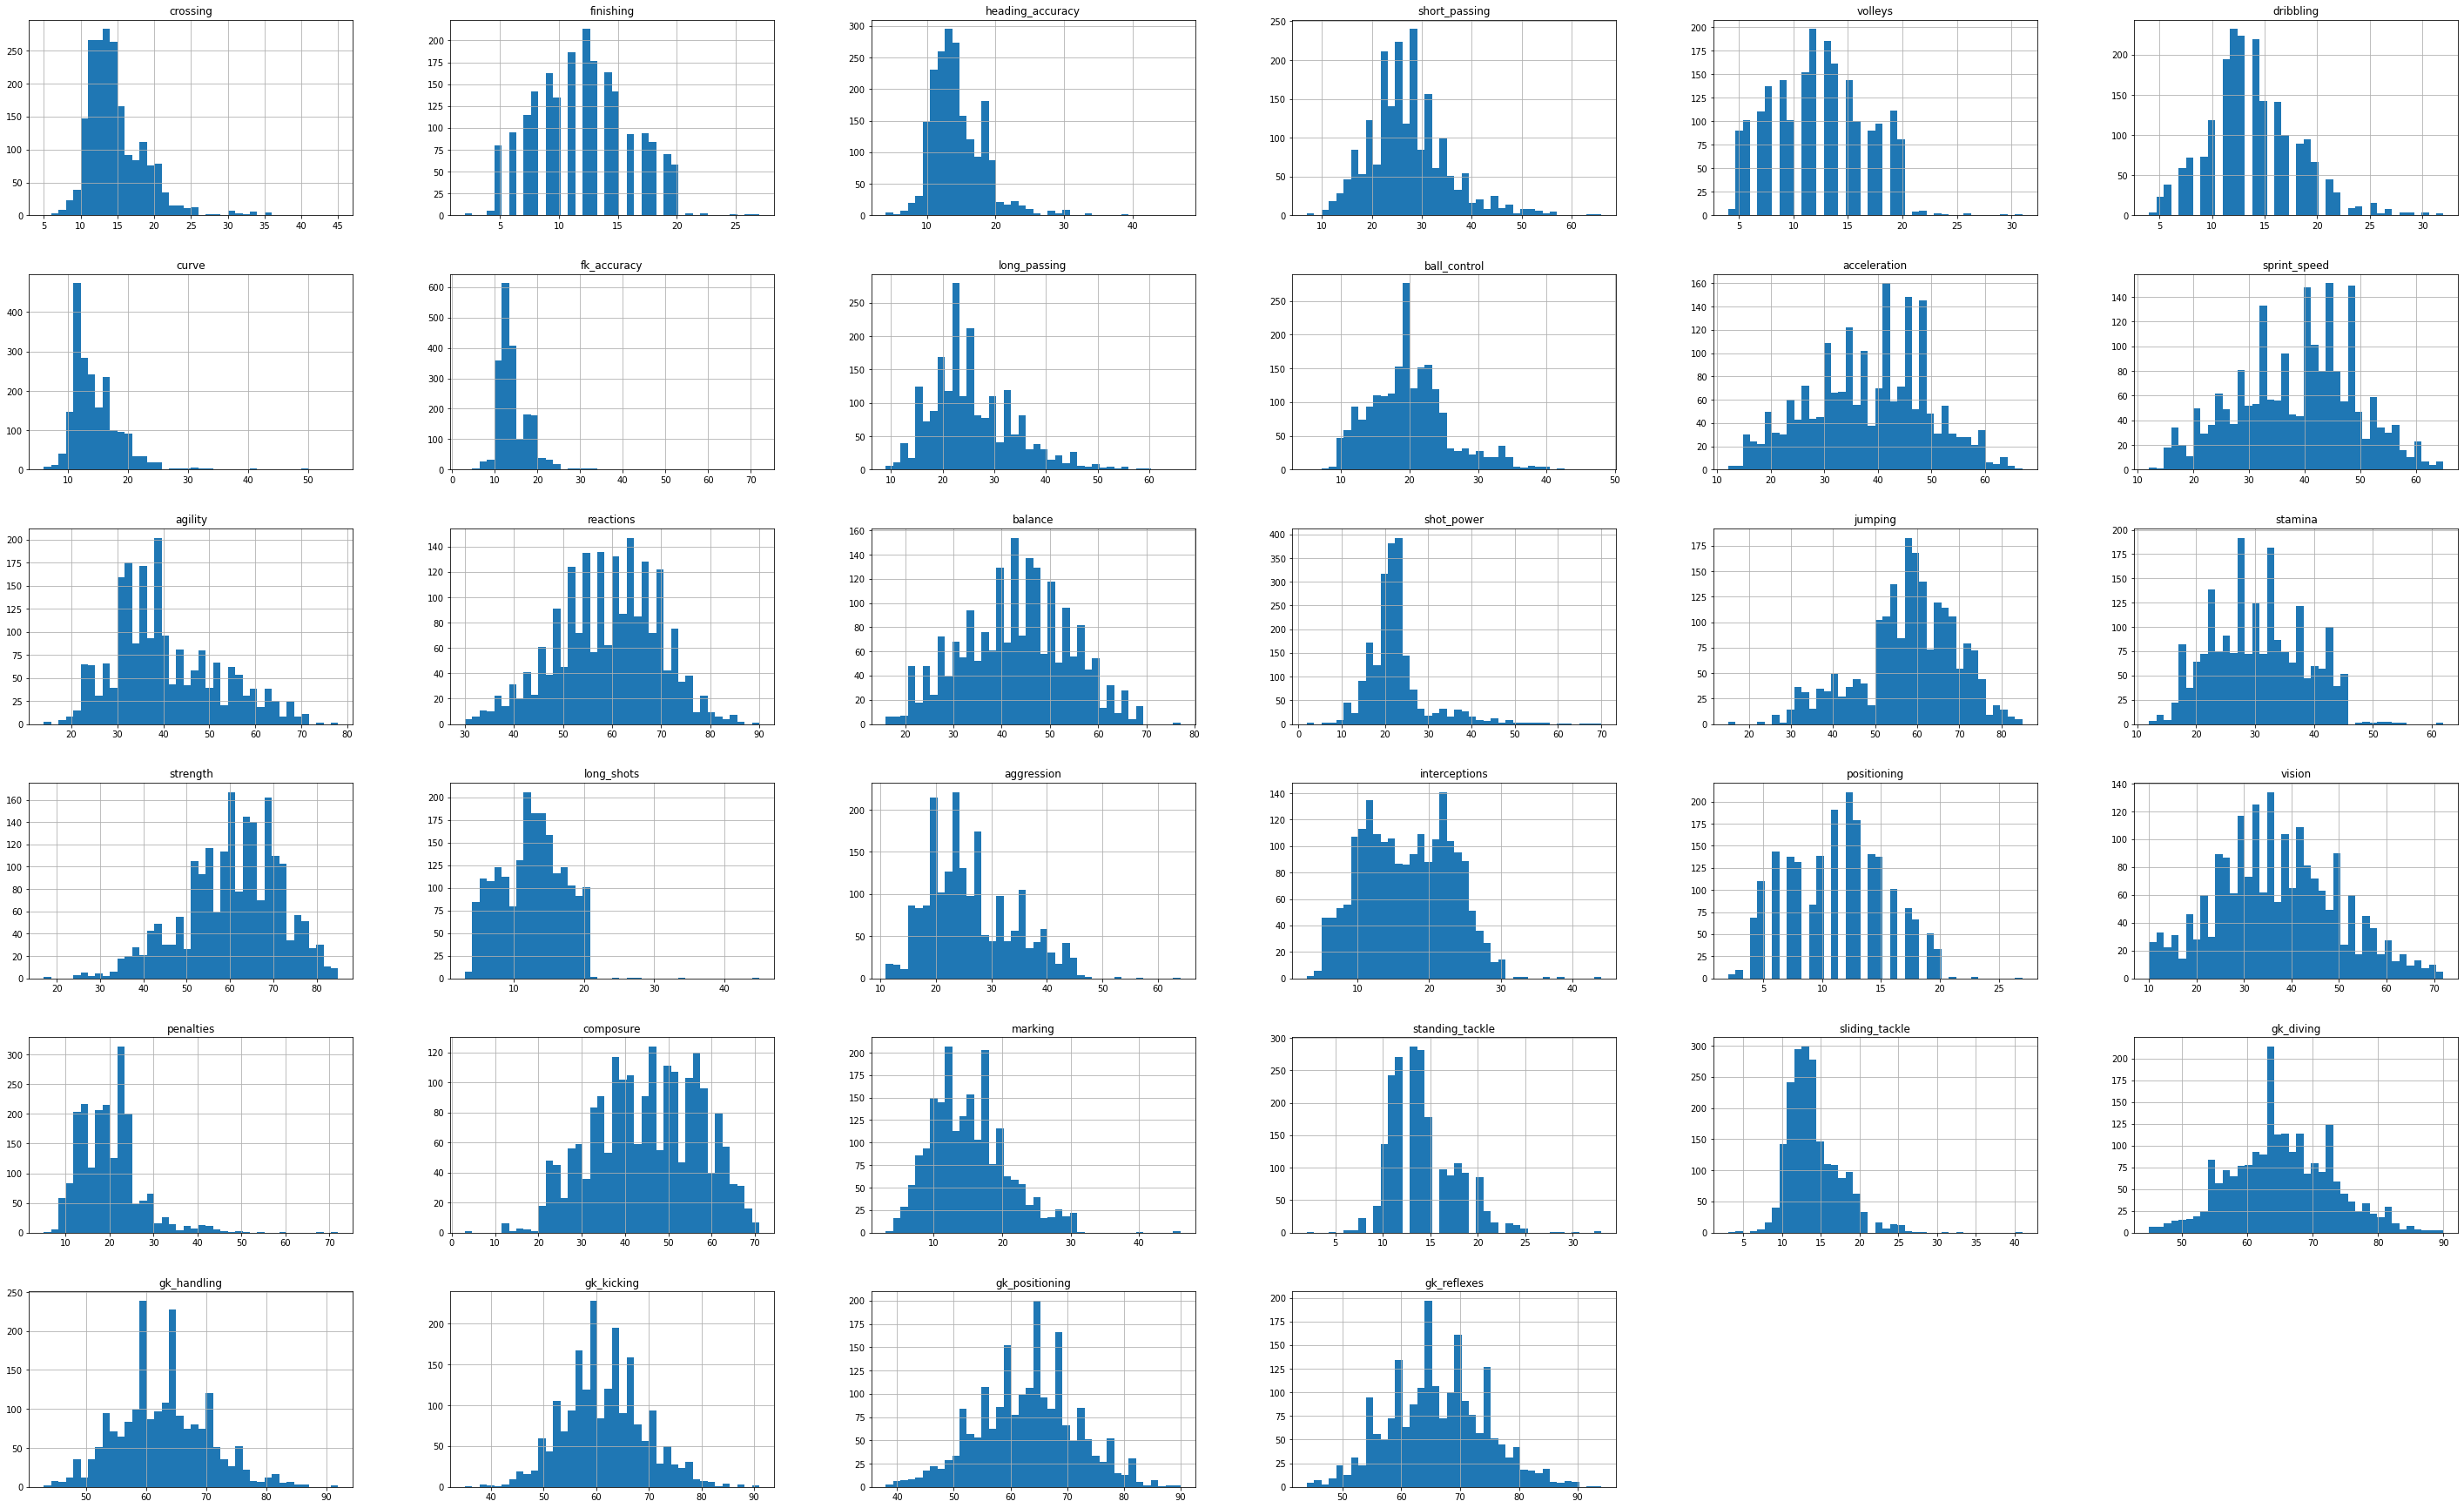

In [3]:
goal_keepers_df.drop(['rating', 'weight', 'overall', 'potential'], axis = 1).hist(bins=40, figsize=(50,31))
plt.show()

In [4]:
goal_keepers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           2025 non-null   int64  
 1   potential         2025 non-null   int64  
 2   field_position    2025 non-null   object 
 3   height            2025 non-null   object 
 4   weight            2025 non-null   int64  
 5   crossing          2025 non-null   float64
 6   finishing         2025 non-null   float64
 7   heading_accuracy  2025 non-null   float64
 8   short_passing     2025 non-null   float64
 9   volleys           2025 non-null   float64
 10  dribbling         2025 non-null   float64
 11  curve             2025 non-null   float64
 12  fk_accuracy       2025 non-null   float64
 13  long_passing      2025 non-null   float64
 14  ball_control      2025 non-null   float64
 15  acceleration      2025 non-null   float64
 16  sprint_speed      2025 non-null   float64


In [5]:
goal_keepers_df.isna().any()


overall             False
potential           False
field_position      False
height              False
weight              False
crossing            False
finishing           False
heading_accuracy    False
short_passing       False
volleys             False
dribbling           False
curve               False
fk_accuracy         False
long_passing        False
ball_control        False
acceleration        False
sprint_speed        False
agility             False
reactions           False
balance             False
shot_power          False
jumping             False
stamina             False
strength            False
long_shots          False
aggression          False
interceptions       False
positioning         False
vision              False
penalties           False
composure           False
marking             False
standing_tackle     False
sliding_tackle      False
gk_diving           False
gk_handling         False
gk_kicking          False
gk_positioning      False
gk_reflexes 

In [6]:
list(goal_keepers_df)

['overall',
 'potential',
 'field_position',
 'height',
 'weight',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'rating']

In [7]:
# Define Columns we will include
columns = ['field_position', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping',
    'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking',
    'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rating']

# Fit columns into df
goal_keepers_df = goal_keepers_df[columns]

#Print df
goal_keepers_df

,field_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,92.0
1,GK,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,91.5
2,GK,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,90.5
3,GK,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,89.5
4,GK,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,GK,10.0,7.0,11.0,22.0,6.0,8.0,10.0,8.0,20.0,...,28.0,16.0,11.0,10.0,47.0,46.0,50.0,45.0,51.0,56.5
2021,GK,19.0,15.0,15.0,26.0,14.0,13.0,12.0,19.0,19.0,...,28.0,12.0,15.0,16.0,45.0,49.0,50.0,50.0,45.0,53.0
2022,GK,11.0,12.0,12.0,18.0,11.0,11.0,12.0,13.0,13.0,...,56.0,15.0,15.0,13.0,45.0,48.0,44.0,49.0,46.0,48.0
2023,GK,10.0,6.0,10.0,25.0,6.0,12.0,13.0,10.0,20.0,...,23.0,6.0,10.0,11.0,52.0,52.0,52.0,40.0,44.0,56.0


In [8]:
#Create train_set and test_set
train_set, test_set = train_test_split(goal_keepers_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(goal_keepers_df))

target_train = train_set['rating']
train_set = train_set.drop(['rating'], axis = 1)


Length of training data: 1620
Length of testing data: 405
Length of total data: 2025


Separating data into training and testing sets is an important part of evaluating data mining models. Typically, when you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. Analysis Services randomly samples the data to help ensure that the testing and training sets are similar. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model.

After a model has been processed by using the training set, you test the model by making predictions against the test set. Because the data in the testing set already contains known values for the attribute that you want to predict, it is easy to determine whether the model's guesses are correct.

In [9]:
corr_matrix = goal_keepers_df.corr()
corr_matrix['rating'].sort_values(ascending=False)

rating              1.000000
gk_reflexes         0.904704
gk_diving           0.900802
gk_handling         0.868879
gk_positioning      0.855436
reactions           0.765952
gk_kicking          0.724037
composure           0.465866
vision              0.393388
sprint_speed        0.390570
acceleration        0.389657
jumping             0.388231
agility             0.355356
interceptions       0.304869
strength            0.299439
ball_control        0.285068
stamina             0.280894
long_shots          0.259152
short_passing       0.256571
volleys             0.255391
dribbling           0.252343
positioning         0.249581
long_passing        0.243556
finishing           0.242229
penalties           0.230184
aggression          0.188112
marking             0.141010
curve               0.138618
shot_power          0.129467
fk_accuracy         0.116309
balance             0.110491
crossing            0.092254
standing_tackle     0.079279
heading_accuracy    0.076959
sliding_tackle

You can compute the standard correlation coefficient between each pair of attributes using the corr() method. Looking at all the correlations between each attribute will take up too much time, so let’s just see how much each attribute correlates with the Rating value.

The correlation coefficient ranges from -1 to 1. When the correlation coefficient is close to 1, it means that there is a strong positive correlation; for example, Rating tends to go up when GKReflexes goes up. When the correlation coefficient is close to -1, it means that there is a strong negative correlation (i.e., the opposite of a strong positive correlation).



In [10]:
for position in goal_keepers_df['field_position'].unique(): 
    
    try:
    
        # Subset by position
        temp_df = goal_keepers_df[goal_keepers_df['field_position'] == position]

        # Find correlations
        temp_corr = goal_keepers_df[goal_keepers_df['field_position'] == position].corr()['rating'].to_frame()
        temp_corr = temp_corr[temp_corr['rating'] > 0.5]


        # Keep only columns with correltion above 0.5
        temp_features = list(temp_corr.T)
        temp_model_df = temp_df[temp_features]

        #print(temp_features)
        # Split data into train and test, isolate y (target/dependent variable)
        train_set, test_set = train_test_split(temp_model_df, test_size=0.2, random_state=42)
        target_train = train_set['rating']
        train_set = train_set.drop(['rating'], axis = 1) #, 'potential', 'overall'], axis = 1)
        

        # Fit model
        train_set = sm.add_constant(train_set, prepend=False)

        # Fit and summarize OLS model
        mod = sm.OLS(target_train, train_set)

        res = mod.fit()
        
        features = pd.DataFrame([res.pvalues, res.params]).T
        features.columns = ['P-value', 'Coefficient']
        features = features[features['P-value']<0.05]
        features = features.sort_values(by = 'Coefficient', ascending = False)
    

        print(f' ********* Current Position: {position}: \n ')
        print(f' ********* Significant features in order of impact: {features.index}: \n ')
        print(res.summary())
        print('\n')
        
    except BaseException as e: 
        print(f'WARNING: SKIPPING {position} due to {e}')

 ********* Current Position: GK: 
 
 ********* Significant features in order of impact: Index(['const', 'gk_reflexes', 'gk_diving', 'gk_handling', 'gk_positioning',
       'gk_kicking'],
      dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2228.
Date:                Thu, 15 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:14:20   Log-Likelihood:                -3527.4
No. Observations:                1620   AIC:                             7069.
Df Residuals:                    1613   BIC:                             7106.
Df Model:                           6                                         
Covariance Type:            nonrobust                                       

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.